In [234]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [255]:
tickers = ["AAPL","AMD","PYPL","NKE","YUM","SNPS","CMG"]
Rf = 0 # this can be changed later, for the purpose of this project I will keep Rf at 0 
portfolioCount = 50000

In [256]:
df = yf.download(tickers, start="2016-01-01",end="2020-01-01")
df = np.log(1+df["Adj Close"].pct_change())

[*********************100%***********************]  7 of 7 completed


Portfolio return formula = $w_{1}$ $\cdot$ $\mu_{1}$ + $w_{2}$ $\cdot$ $\mu_{2}$

In [257]:
def weightsCreator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    rand = rand.round(3)
    return rand
# annualized returns (multiplied by 365 if cryptocurrency)

def portfolioReturn(weights):
    return np.dot(df.mean(),weights)*np.sqrt(252)

def portfolioSTD(weights):
    return (np.dot(np.dot(df.cov(),weights),weights))**(0.5)*np.sqrt(252)

Portfolio variance = $w^{2}_{1}$ $\cdot$ $\sigma^{2}_{1}$ + $w^{2}_{2}$ $\cdot$ $\sigma^{2}_{2}$ + 2 $\cdot$ $w_{1}$ $\cdot$ $w_{2}$ + $Cov_{1,2}$

In [258]:
returns = [] 
risk = []
weights = []
for ii in range(portfolioCount):
    w = weightsCreator(df)
    returns.append(portfolioReturns(w))
    risk.append(portfolioSTD(w))
    weights.append(w)

sharpe ratio = $\frac{(rx - Rf)}{std(x)}$

In [259]:
#convert to numpy aarrays 

returns = np.array(returns)
risk = np.array(risk)

metrics = [returns, risk, sharpe_ratios, weights]
portfolio = pd.DataFrame(metrics).T
portfolio.columns = ["Returns","Risk","Sharpe","Weights"]

In [260]:
min_risk = portfolio.iloc[portfolio["Risk"].astype(float).idxmin()]
highest_return = portfolio.iloc[portfolio["Returns"].astype(float).idxmax()]

print("Lowest Risk")
print(min_risk)
print(tickers)
print('')
print("Highest Return")
print(highest_return)
print(tickers)


Lowest Risk
Returns                                             0.198141
Risk                                                0.151401
Sharpe                                                  None
Weights    [0.059, 0.001, 0.041, 0.252, 0.027, 0.183, 0.437]
Name: 33719, dtype: object
['AAPL', 'AMD', 'PYPL', 'NKE', 'YUM', 'SNPS', 'CMG']

Highest Return
Returns                                             0.542164
Risk                                                0.445149
Sharpe                                              0.307221
Weights    [0.015, 0.651, 0.036, 0.035, 0.184, 0.027, 0.051]
Name: 22327, dtype: object
['AAPL', 'AMD', 'PYPL', 'NKE', 'YUM', 'SNPS', 'CMG']


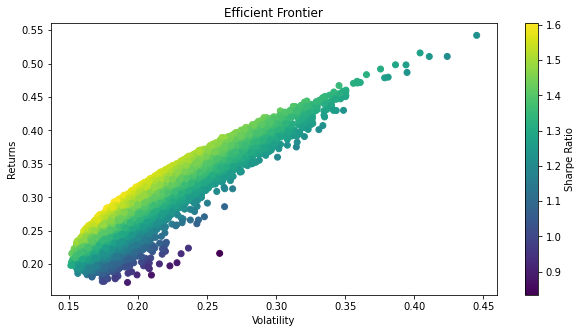

In [261]:
plt.figure(figsize=(10,5))
plt.scatter(risk, returns, c = returns/risk)
plt.title("Efficient Frontier")
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.colorbar(label = "Sharpe Ratio")
plt.show()